# Adversarial Attacks: CNN and GLRT under FGSM/PGD (L∞ and L2)

In [ ]:
import sys
sys.path.append('../src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

from cnn import load_model
from adversarial_attacks import evaluate_attack_across_epsilons

## Load Model

In [2]:
model = load_model('cnn', load_dir='../models/noattack')

Model loaded from ../models/noattack/cnn.h5


In [3]:
df_glrt_accuracy = pd.read_csv("../results/noattack/glrt_accuracy.csv")

# Extract the threshold value
threshold = df_glrt_accuracy["glrt_threshold"].iloc[0]

# Wrap it for input to the attack evaluation function
glrt_threshold = {"GLRT_95": threshold}

print(f"Loaded GLRT threshold: {threshold}")

Loaded GLRT threshold: 13.293898240143388


## Load Improved Dataset

In [4]:
data = loadmat('../data/processed/improved_signals.mat')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']
signal2_start_times = data['signal2_start_times']
print(f"Improved Test Set Shape: {X_test.shape}")

Improved Test Set Shape: (5628, 8, 500, 2)


## Define Epsilon Ranges

In [5]:
epsilon_values_inf = np.linspace(0.0, 0.005, 20)
epsilon_values_2norm = np.linspace(0.0, 0.15, 20)

## Run Adversarial Attacks

### FGSM - L inf

In [6]:
cnn_fgsm_inf, glrt_fgsm_inf, cnn_preds_fgsm_inf, glrt_preds_fgsm_inf = evaluate_attack_across_epsilons(
    model, X_test, y_test,
    epsilon_values=epsilon_values_inf,
    glrt_threshold=threshold,
    attack_type='fgsm', norm='inf'
)

[FGSM-inf] Epsilon = 0.00000
[FGSM-inf] Epsilon = 0.00026
[FGSM-inf] Epsilon = 0.00053
[FGSM-inf] Epsilon = 0.00079
[FGSM-inf] Epsilon = 0.00105
[FGSM-inf] Epsilon = 0.00132
[FGSM-inf] Epsilon = 0.00158
[FGSM-inf] Epsilon = 0.00184
[FGSM-inf] Epsilon = 0.00211
[FGSM-inf] Epsilon = 0.00237
[FGSM-inf] Epsilon = 0.00263
[FGSM-inf] Epsilon = 0.00289
[FGSM-inf] Epsilon = 0.00316
[FGSM-inf] Epsilon = 0.00342
[FGSM-inf] Epsilon = 0.00368
[FGSM-inf] Epsilon = 0.00395
[FGSM-inf] Epsilon = 0.00421
[FGSM-inf] Epsilon = 0.00447
[FGSM-inf] Epsilon = 0.00474
[FGSM-inf] Epsilon = 0.00500


In [7]:
df_fgsm_inf = pd.DataFrame({
    "epsilon": epsilon_values_inf,
    "cnn_accuracy": cnn_fgsm_inf,
    "glrt_accuracy": glrt_fgsm_inf
})
df_fgsm_inf

,epsilon,cnn_accuracy,glrt_accuracy
0,0.000000,0.982942,0.979744
1,0.000263,0.961087,0.974591
2,0.000526,0.911869,0.965352
3,0.000789,0.835110,0.952914
4,0.001053,0.740050,0.937633
5,0.001316,0.633262,0.925906
6,0.001579,0.527896,0.910981
7,0.001842,0.427505,0.885394
8,0.002105,0.347370,0.865494
9,0.002368,0.287846,0.846660


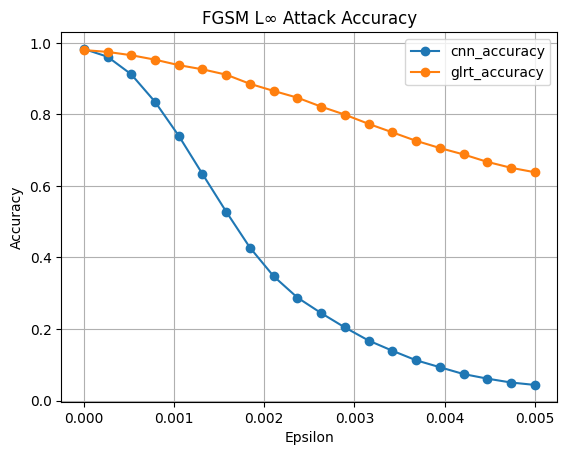

In [8]:
df_fgsm_inf.plot(x="epsilon", y=["cnn_accuracy", "glrt_accuracy"], marker='o')
plt.title("FGSM L∞ Attack Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [9]:
df_fgsm_inf.to_csv("../results/improved_attacks/fgsm_inf_accuracy.csv")

In [23]:
cnn_pred_df = pd.DataFrame(cnn_preds_fgsm_inf).T
glrt_pred_df = pd.DataFrame(glrt_preds_fgsm_inf).T
cnn_pred_df.to_csv("../results/improved_attacks/fgsm_inf_cnn_predictions.csv")
glrt_pred_df.to_csv("../results/improved_attacks/fgsm_inf_glrt_predictions.csv")

### FGSM - L2

In [9]:
cnn_fgsm_l2, glrt_fgsm_l2, cnn_preds_fgsm_l2, glrt_preds_fgsm_l2 = evaluate_attack_across_epsilons(
    model, X_test, y_test,
    epsilon_values=epsilon_values_2norm,
    glrt_threshold=threshold,
    attack_type='fgsm', norm='2'
)

[FGSM-2] Epsilon = 0.00000
[FGSM-2] Epsilon = 0.00789
[FGSM-2] Epsilon = 0.01579
[FGSM-2] Epsilon = 0.02368
[FGSM-2] Epsilon = 0.03158
[FGSM-2] Epsilon = 0.03947
[FGSM-2] Epsilon = 0.04737
[FGSM-2] Epsilon = 0.05526
[FGSM-2] Epsilon = 0.06316
[FGSM-2] Epsilon = 0.07105
[FGSM-2] Epsilon = 0.07895
[FGSM-2] Epsilon = 0.08684
[FGSM-2] Epsilon = 0.09474
[FGSM-2] Epsilon = 0.10263
[FGSM-2] Epsilon = 0.11053
[FGSM-2] Epsilon = 0.11842
[FGSM-2] Epsilon = 0.12632
[FGSM-2] Epsilon = 0.13421
[FGSM-2] Epsilon = 0.14211
[FGSM-2] Epsilon = 0.15000


In [12]:
df_fgsm_l2 = pd.DataFrame({
    "epsilon": epsilon_values_2norm,
    "cnn_accuracy": cnn_fgsm_l2,
    "glrt_accuracy": glrt_fgsm_l2
})
df_fgsm_l2.head()

,epsilon,cnn_accuracy,glrt_accuracy
0,0.000000,0.982942,0.979744
1,0.007895,0.971215,0.978145
2,0.015789,0.950782,0.976368
3,0.023684,0.918799,0.976368
4,0.031579,0.875444,0.976190


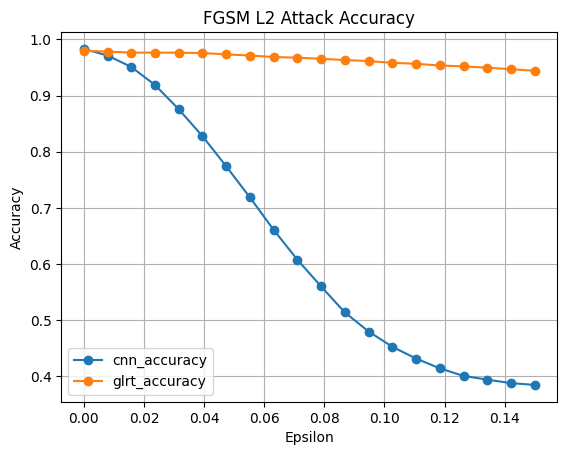

In [13]:
df_fgsm_l2.plot(x="epsilon", y=["cnn_accuracy", "glrt_accuracy"], marker='o')
plt.title("FGSM L2 Attack Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [15]:
df_fgsm_l2.to_csv("../results/improved_attacks/fgsm_l2_accuracy.csv")

In [24]:
df_cnn_preds_fgsm_l2 = pd.DataFrame(cnn_preds_fgsm_l2).T
df_glrt_preds_fgsm_l2 = pd.DataFrame(glrt_preds_fgsm_l2).T
df_cnn_preds_fgsm_l2.to_csv("../results/improved_attacks/fgsm_l2_cnn_predictions.csv")
df_glrt_preds_fgsm_l2.to_csv("../results/improved_attacks/fgsm_l2_glrt_predictions.csv")

### PGD - L inf

In [10]:
cnn_pgd_inf, glrt_pgd_inf, cnn_preds_pgd_inf, glrt_preds_pgd_inf = evaluate_attack_across_epsilons(
    model, X_test, y_test,
    epsilon_values=epsilon_values_inf,
    glrt_threshold=threshold,
    attack_type='pgd', norm='inf'
)

[PGD-inf] Epsilon = 0.00000
[PGD-inf] Epsilon = 0.00026
[PGD-inf] Epsilon = 0.00053
[PGD-inf] Epsilon = 0.00079
[PGD-inf] Epsilon = 0.00105
[PGD-inf] Epsilon = 0.00132
[PGD-inf] Epsilon = 0.00158
[PGD-inf] Epsilon = 0.00184
[PGD-inf] Epsilon = 0.00211
[PGD-inf] Epsilon = 0.00237
[PGD-inf] Epsilon = 0.00263
[PGD-inf] Epsilon = 0.00289
[PGD-inf] Epsilon = 0.00316
[PGD-inf] Epsilon = 0.00342
[PGD-inf] Epsilon = 0.00368
[PGD-inf] Epsilon = 0.00395
[PGD-inf] Epsilon = 0.00421
[PGD-inf] Epsilon = 0.00447
[PGD-inf] Epsilon = 0.00474
[PGD-inf] Epsilon = 0.00500


In [16]:
df_pgd_inf = pd.DataFrame({
    "epsilon": epsilon_values_inf,
    "cnn_accuracy": cnn_pgd_inf,
    "glrt_accuracy": glrt_pgd_inf
})
df_pgd_inf.head()

,epsilon,cnn_accuracy,glrt_accuracy
0,0.000000,0.982942,0.979744
1,0.000263,0.960732,0.974947
2,0.000526,0.905650,0.966418
3,0.000789,0.813077,0.957711
4,0.001053,0.691542,0.949183


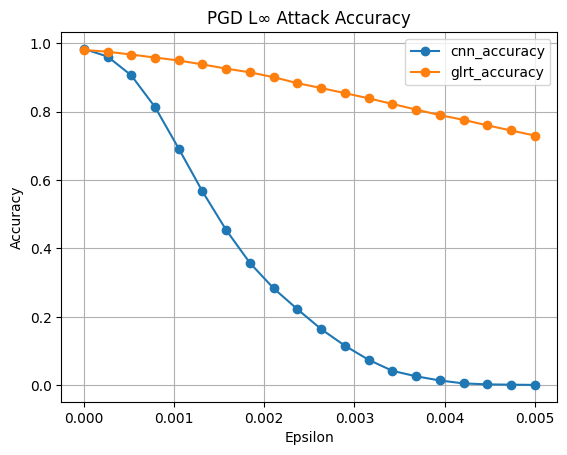

In [17]:
df_pgd_inf.plot(x="epsilon", y=["cnn_accuracy", "glrt_accuracy"], marker='o')
plt.title("PGD L∞ Attack Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [18]:
df_pgd_inf.to_csv("../results/improved_attacks/pgd_inf_accuracy.csv")

In [25]:
df_cnn_preds_pgd_inf = pd.DataFrame(cnn_preds_pgd_inf).T
df_glrt_preds_pgd_inf = pd.DataFrame(glrt_preds_pgd_inf).T
df_cnn_preds_pgd_inf.to_csv("../results/improved_attacks/pgd_inf_cnn_predictions.csv")
df_glrt_preds_pgd_inf.to_csv("../results/improved_attacks/pgd_inf_glrt_predictions.csv")

### PGD - L2

In [11]:
cnn_pgd_l2, glrt_pgd_l2, cnn_preds_pgd_l2, glrt_preds_pgd_l2 = evaluate_attack_across_epsilons(
    model, X_test, y_test,
    epsilon_values=epsilon_values_2norm,
    glrt_threshold=threshold,
    attack_type='pgd', norm='2'
)

[PGD-2] Epsilon = 0.00000
[PGD-2] Epsilon = 0.00789
[PGD-2] Epsilon = 0.01579
[PGD-2] Epsilon = 0.02368
[PGD-2] Epsilon = 0.03158
[PGD-2] Epsilon = 0.03947
[PGD-2] Epsilon = 0.04737
[PGD-2] Epsilon = 0.05526
[PGD-2] Epsilon = 0.06316
[PGD-2] Epsilon = 0.07105
[PGD-2] Epsilon = 0.07895
[PGD-2] Epsilon = 0.08684
[PGD-2] Epsilon = 0.09474
[PGD-2] Epsilon = 0.10263
[PGD-2] Epsilon = 0.11053
[PGD-2] Epsilon = 0.11842
[PGD-2] Epsilon = 0.12632
[PGD-2] Epsilon = 0.13421
[PGD-2] Epsilon = 0.14211
[PGD-2] Epsilon = 0.15000


In [19]:
df_pgd_l2 = pd.DataFrame({
    "epsilon": epsilon_values_2norm,
    "cnn_accuracy": cnn_pgd_l2,
    "glrt_accuracy": glrt_pgd_l2
})
df_pgd_l2.head()

,epsilon,cnn_accuracy,glrt_accuracy
0,0.000000,0.982942,0.979744
1,0.007895,0.971038,0.978678
2,0.015789,0.948827,0.977257
3,0.023684,0.912580,0.977257
4,0.031579,0.861763,0.977079


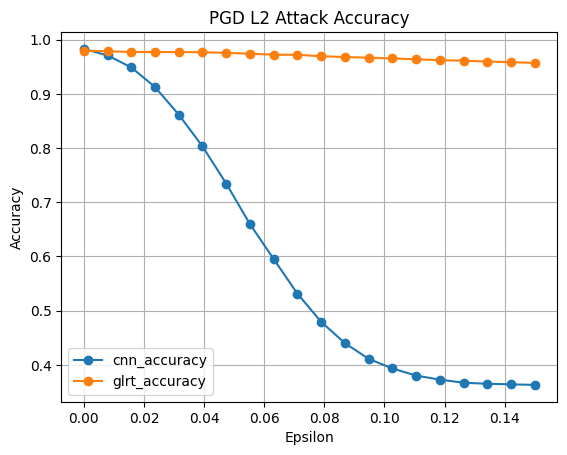

In [20]:
df_pgd_l2.plot(x="epsilon", y=["cnn_accuracy", "glrt_accuracy"], marker='o')
plt.title("PGD L2 Attack Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [22]:
df_pgd_l2.to_csv("../results/improved_attacks/pgd_l2_accuracy.csv")

In [26]:
df_cnn_preds_pgd_l2 = pd.DataFrame(cnn_preds_pgd_l2).T
df_glrt_preds_pgd_l2 = pd.DataFrame(glrt_preds_pgd_l2).T
df_cnn_preds_pgd_l2.to_csv("../results/improved_attacks/pgd_l2_cnn_predictions.csv")
df_glrt_preds_pgd_l2.to_csv("../results/improved_attacks/pgd_l2_glrt_predictions.csv")